In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the SuperHero information and superhero power dataset

In [44]:
super_hero_powers = pd.read_csv('data/super_hero_powers.csv')
super_hero_info = pd.read_csv('data/heroes_information.csv')

#### Let's separate the superheroes into male and female catagories

In [45]:
female_heroes = super_hero_info[super_hero_info["Gender"] == "Female"]
display(female_heroes.head(3))
male_heroes = super_hero_info[super_hero_info["Gender"] == "Male"]
display(male_heroes.head(3))

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
24,24,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
25,25,Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


In [46]:
hero = super_hero_info

#### Lemme clean the data first and delete some unwanted stuffs

In [47]:
hero.isnull().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [48]:
hero = hero.drop_duplicates()

In [49]:
if 'Unnamed: 0' in hero.columns:
    hero.drop('Unnamed: 0', axis=1, inplace=True)
hero.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [50]:
hero.replace(-99.0, np.nan, inplace=True)
hero.replace('-', 'Unknown' , inplace=True)
hero.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN


In [51]:
hero.isnull().sum()

name            0
Gender          0
Eye color       0
Race            0
Hair color      0
Height        217
Publisher      15
Skin color      0
Alignment       0
Weight        239
dtype: int64

In [52]:
heroes_with_no_publisher = hero[hero['Publisher'].isnull()]
hero.drop(heroes_with_no_publisher.index, inplace=True)

In [53]:
heroes_with_no_publisher

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,Unknown,Black,NaN,NaN,Unknown,good,NaN
86,Bionic Woman,Female,blue,Cyborg,Black,NaN,NaN,Unknown,good,NaN
138,Brundlefly,Male,Unknown,Mutant,Unknown,193.0,NaN,Unknown,Unknown,NaN
175,Chuck Norris,Male,Unknown,Unknown,Unknown,178.0,NaN,Unknown,good,NaN
204,Darkside,Unknown,Unknown,Unknown,Unknown,NaN,NaN,Unknown,bad,NaN
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,Unknown,good,NaN
263,Flash Gordon,Male,Unknown,Unknown,Unknown,NaN,NaN,Unknown,good,NaN
286,Godzilla,Unknown,Unknown,Kaiju,Unknown,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,Unknown,Unknown,Unknown,NaN,NaN,Unknown,good,NaN
354,Jason Bourne,Male,Unknown,Human,Unknown,NaN,NaN,Unknown,good,NaN


In [54]:
hero.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN


In [55]:
hero.drop('Skin color', axis=1, inplace=True)
hero.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN


In [56]:
Unknown_hero = hero[hero["Alignment"] == "Unknown"]
Unknown_hero

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
33,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,Unknown,358.0
110,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,Unknown,88.0
426,Man of Miracles,Unknown,blue,God / Eternal,Silver,NaN,Image Comics,Unknown,NaN
535,Q,Male,Unknown,God / Eternal,Unknown,NaN,Star Trek,Unknown,NaN
676,Trickster,Male,blue,Human,Blond,183.0,DC Comics,Unknown,81.0
692,Venompool,Male,Unknown,Symbiote,Unknown,226.0,Marvel Comics,Unknown,NaN


In [57]:
Unknown_hero = hero[hero["Alignment"] == "Unknown"]
hero.drop(Unknown_hero.index, inplace=True)
hero.head()


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN


In [58]:
heroes_with_unknown_gender = hero[hero['Gender'] == 'Unknown']
hero.drop(heroes_with_unknown_gender.index, inplace=True)

#### Lesee Which Publisher has more heroes

<Axes: ylabel='Publisher'>

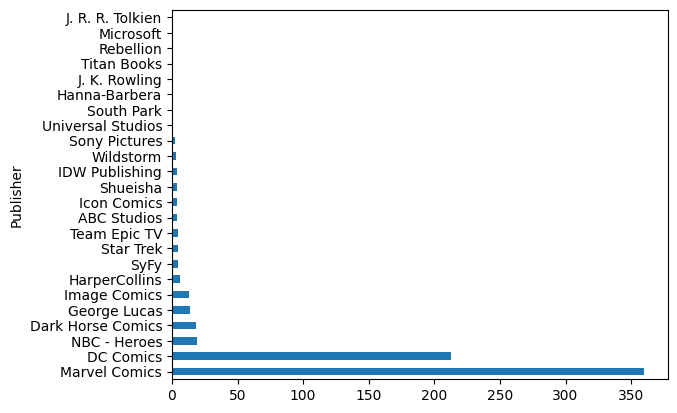

In [59]:
publisher_counts = hero['Publisher'].value_counts()
publisher_counts.plot(kind='barh')


#### We will keep DC and Marvel and remove the others



In [60]:

hero_df_filtered1 = hero[hero['Publisher'].isin(['Marvel Comics', 'DC Comics'])]
hero = hero_df_filtered1
hero.reset_index(drop=True,inplace=True)

<Axes: ylabel='count'>

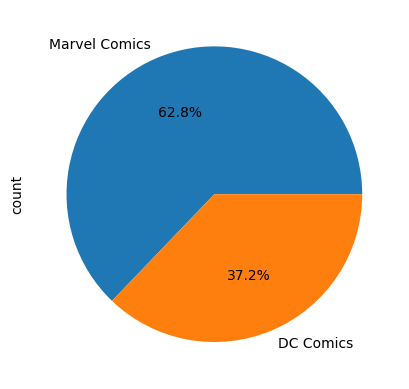

In [61]:
hero['Publisher'].value_counts().plot(kind='pie', autopct='%1.1f%%')


#### Now we going to read the second dataset (Superheros got their powers)

In [62]:
power = pd.read_csv('data/super_hero_powers.csv')
power.head()


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
filterd_power = power[power['hero_names'].isin(hero['name'])]
power = filterd_power
power.reset_index(drop=True,inplace=True)
len(power)

502

In [64]:
filterd_hero = hero[hero['name'].isin(power['hero_names'])]
hero = filterd_hero
hero.reset_index(drop=True,inplace=True)
len(hero)

517

We must remove 15 duplicates

In [65]:
name_counts = hero['name'].value_counts()

names_more_than_once = name_counts[name_counts > 1].index.tolist()

names_more_than_once

['Batgirl',
 'Vindicator',
 'Firestorm',
 'Black Canary',
 'Atlas',
 'Atom',
 'Batman',
 'Blue Beetle',
 'Blizzard',
 'Captain Marvel',
 'Namor',
 'Nova',
 'Speedy',
 'Spider-Man',
 'Toxin']

In [66]:
hero_unique = hero.drop_duplicates(subset='name', keep='first')
hero = hero_unique
hero.reset_index(drop=True,inplace=True)

#### Here we go / we going to compare marvel and DC

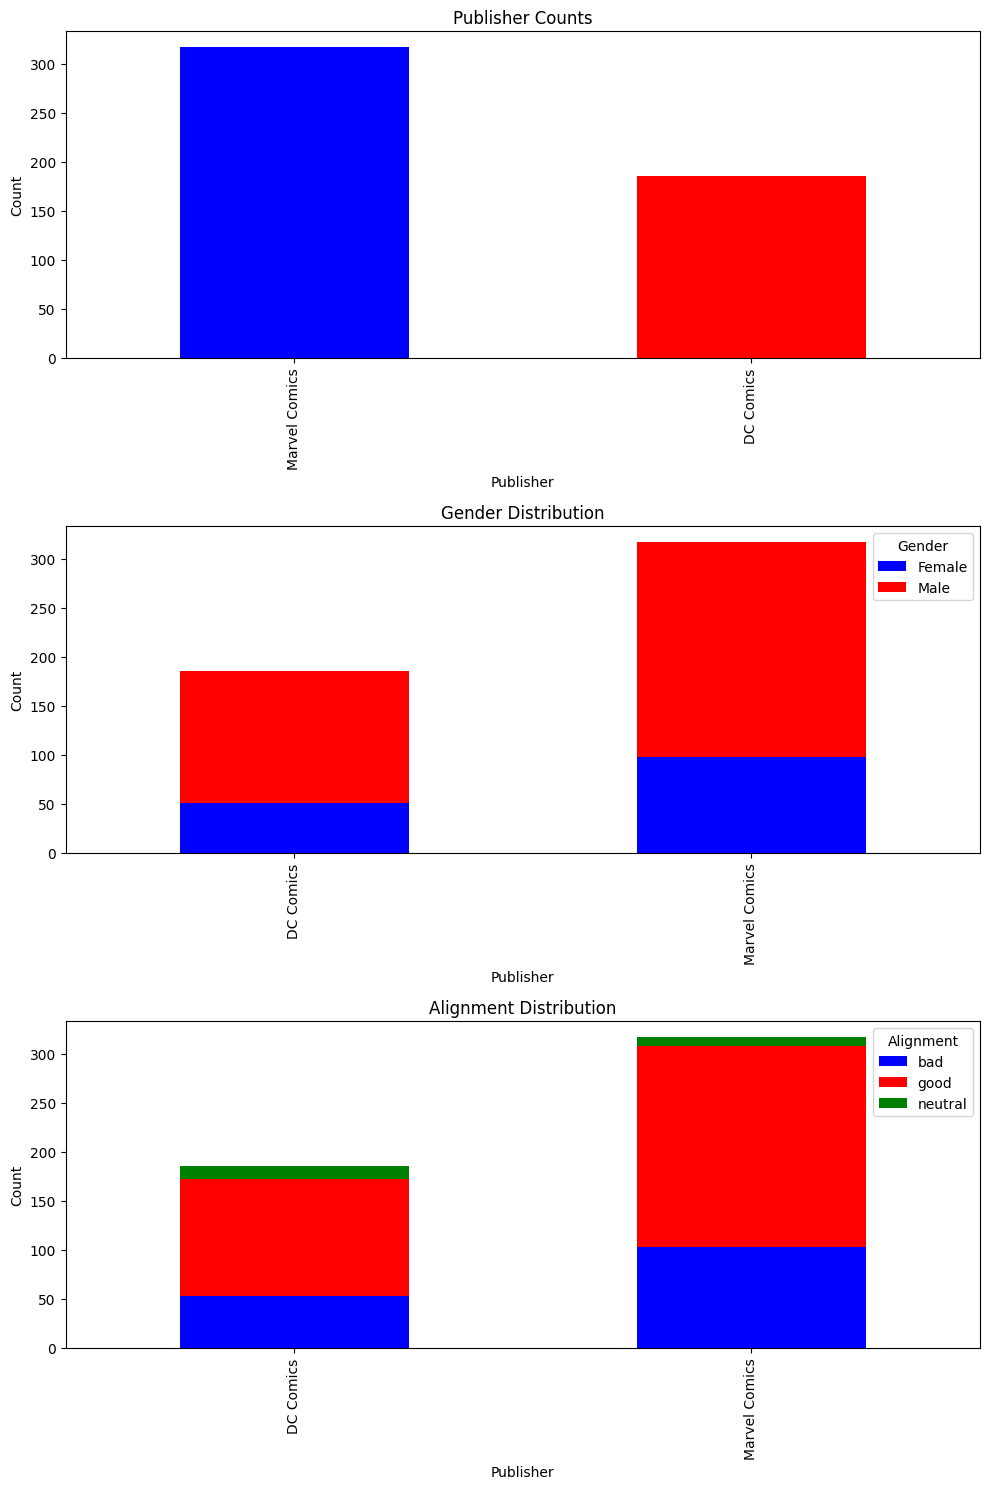

<Figure size 640x480 with 0 Axes>

In [67]:
marvel_dc_heroes = hero[hero['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

publisher_counts = marvel_dc_heroes['Publisher'].value_counts()

gender_counts = marvel_dc_heroes.groupby('Publisher')['Gender'].value_counts().unstack().fillna(0)

alignment_counts = marvel_dc_heroes.groupby('Publisher')['Alignment'].value_counts().unstack().fillna(0)


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

publisher_counts.plot(kind='bar', ax=axes[0], color=['blue', 'red'])
axes[0].set_title('Publisher Counts')
axes[0].set_ylabel('Count')

gender_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['blue', 'red'])
axes[1].set_title('Gender Distribution')
axes[1].set_ylabel('Count')

alignment_counts.plot(kind='bar', stacked=True, ax=axes[2], color=['blue', 'red', 'green'])
axes[2].set_title('Alignment Distribution')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.savefig('superhero_stats.png')

In [68]:
power = power.rename(columns={'hero_names': 'name'})

hero_power=pd.merge(hero,power,on="name",how="outer")
display(hero_power.head())
print("We merged Two dataframes")

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
1,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
2,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
3,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False


We merged Two dataframes


### Now we going to see Anti Heroes (aliignment = Neutral), Heroes (Allignemnt = Good) and Villians (allignment = bad)

#### Let's start with antihero

In [69]:
anti_hero = hero_power[hero_power['Alignment'] == 'neutral']
anti_hero.reset_index(drop=True,inplace=True)

i,x = 0,0
anti_hero_data = {
  'name' : []
  , 'num_powers' : []
  , 'publisher' : []
}
while i != len(anti_hero):
  for power in anti_hero :
    if anti_hero[power][i] == True:
      x = x + 1
  anti_hero_data['name'].append(anti_hero['name'][i])
  anti_hero_data['publisher'].append(anti_hero['Publisher'][i])
  anti_hero_data['num_powers'].append(x)
  x = 0
  i = i + 1

anti_hero = pd.DataFrame(anti_hero_data)
len(anti_hero)
display(anti_hero)

,name,num_powers,publisher
0,Bizarro,23,DC Comics
1,Black Flash,13,DC Comics
2,Captain Cold,2,DC Comics
3,Copycat,5,Marvel Comics
4,Deadpool,16,Marvel Comics
5,Deathstroke,11,DC Comics
6,Etrigan,10,DC Comics
7,Galactus,32,Marvel Comics
8,Gladiator,15,Marvel Comics
9,Indigo,6,DC Comics


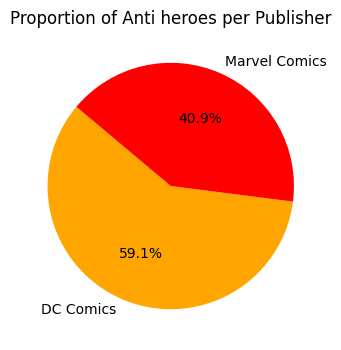

<Figure size 640x480 with 0 Axes>

In [70]:
anti_heroes_per_publisher = anti_hero['publisher'].value_counts()

plt.figure(figsize=(6, 4))
anti_heroes_per_publisher.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'red'], startangle=140)
plt.title('Proportion of Anti heroes per Publisher')
plt.ylabel('')
plt.show()
plt.savefig('data/anti_heroes.png')

From this we can see that DC has anti heroes more than Marvel



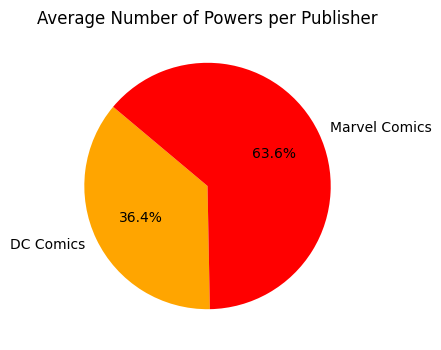

In [71]:
average_powers_per_publisher = anti_hero.groupby('publisher')['num_powers'].mean()

plt.figure(figsize=(6, 4))
average_powers_per_publisher.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'red'], startangle=140)
plt.title('Average Number of Powers per Publisher')
plt.ylabel('')
plt.show()

Despite of having more anti heroes with DC, marvel has more number of powers of antiheroes

In [72]:
top_3_anti_heroes = anti_hero.nlargest(3, 'num_powers')
top_3_anti_heroes

,name,num_powers,publisher
7,Galactus,32,Marvel Comics
0,Bizarro,23,DC Comics
18,Sentry,22,Marvel Comics


The most powerful anti hero is Galactus from Marvel

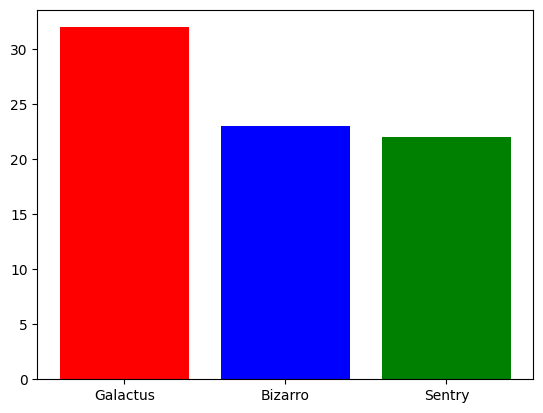

In [73]:
plt.bar(top_3_anti_heroes['name'], top_3_anti_heroes['num_powers'], color=['red', 'blue', 'green'])
plt.savefig('top_3_anti_heroes.png')

#### Let's explore Heroes, expect superman to be most powerful

In [74]:
hero = hero_power[hero_power['Alignment'] == 'good']
hero.reset_index(drop=True,inplace=True)

i,x = 0,0
hero_data = {
  'name' : []
  , 'num_powers' : []
  , 'publisher' : []
}
while i != len(hero):
  for power in hero :
    if hero[power][i] == True:
      x = x + 1
  hero_data['name'].append(hero['name'][i])
  hero_data['publisher'].append(hero['Publisher'][i])
  hero_data['num_powers'].append(x)
  x = 0
  i = i + 1

hero = pd.DataFrame(hero_data)
hero.head()

,name,num_powers,publisher
0,A-Bomb,7,Marvel Comics
1,Abin Sur,1,DC Comics
2,Adam Strange,10,DC Comics
3,Agent Bob,1,Marvel Comics
4,Agent Zero,6,Marvel Comics


publisher
Marvel Comics    205
DC Comics        119
Name: count, dtype: int64

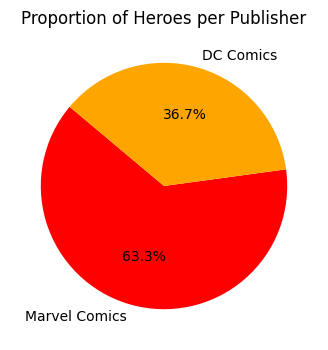

In [75]:
hero_per_publisher = hero['publisher'].value_counts()
display(hero_per_publisher)

plt.figure(figsize=(6, 4))
hero_per_publisher.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange'], startangle=140)
plt.title('Proportion of Heroes per Publisher')
plt.ylabel('')
plt.show()

From this we can see that DC has heroes less than Marvel



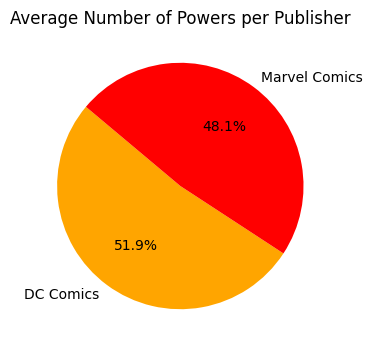

In [76]:
average_powers_per_publisher = hero.groupby('publisher')['num_powers'].mean()

plt.figure(figsize=(6, 4))
average_powers_per_publisher.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'red'], startangle=140)
plt.title('Average Number of Powers per Publisher')
plt.ylabel('')
plt.show()

Although DC has a much smaller number of heroes than Marvel, the number of powers that DC heroes have is greater than the number of powers that Marvel heroes have.

In [77]:
top_3_heroes = hero.nlargest(3, 'num_powers')
top_3_heroes

,name,num_powers,publisher
266,Spectre,49,DC Comics
185,Martian Manhunter,35,DC Comics
73,Captain Marvel,33,Marvel Comics


The most powerful hero is Spectre from DC

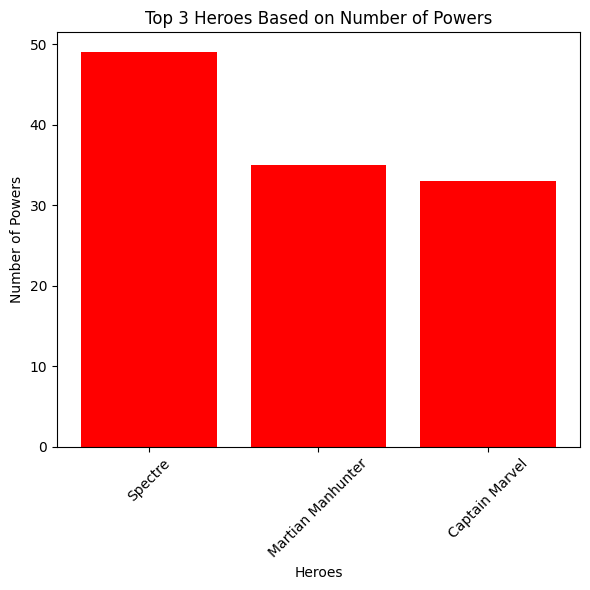

In [78]:
plt.figure(figsize=(6, 6))
plt.bar(top_3_heroes['name'], top_3_heroes['num_powers'], color='red')
plt.xlabel('Heroes')
plt.ylabel('Number of Powers')
plt.title('Top 3 Heroes Based on Number of Powers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_3_heroes.png')
plt.show()

Lets see Spectre vs Superman vs Hulk vs Ironman vs Flash

In [91]:
heroes_to_compare = ['Spectre', 'Superman', 'Hulk', 'Ironman', 'Flash']

comparison_df = hero_power[hero_power['name'].isin(heroes_to_compare)]

comparison_df['num_powers'] = comparison_df.iloc[:, 7:].sum(axis=1)
display(comparison_df)

plt.figure(figsize=(10, 6))
plt.bar(comparison_df['name'], comparison_df['num_powers'], color=['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel('Heroes')
plt.ylabel('Number of Powers')
plt.title('Comparison of Powers: Spectre vs Superman vs Hulk vs Ironman vs Flash')
plt.xticks(rotation=45)
plt.savefig('comparison_heroes_Spectrevs.png')
plt.tight_layout()
plt.show()

TypeError: can only concatenate str (not "float") to str

#### Let's see villians stats

In [80]:
villian = hero_power[hero_power['Alignment'] == 'bad']
villian.reset_index(drop=True,inplace=True)

i,x = 0,0
villian_data = {
  'name' : []
  , 'num_powers' : []
  , 'publisher' : []
}
while i != len(villian):
  for power in villian :
    if villian[power][i] == True:
      x = x + 1
  villian_data['name'].append(villian['name'][i])
  villian_data['publisher'].append(villian['Publisher'][i])
  villian_data['num_powers'].append(x)
  x = 0
  i = i + 1

villian = pd.DataFrame(villian_data)
len(villian)

156

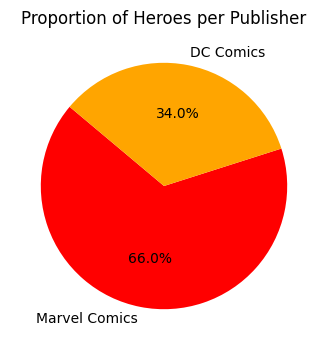

In [81]:
villians_per_publisher = villian['publisher'].value_counts()

plt.figure(figsize=(6, 4))
villians_per_publisher.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange'], startangle=140)
plt.title('Proportion of Heroes per Publisher')
plt.ylabel('')
plt.show()

From this we can see that DC has Villians less than Marvel



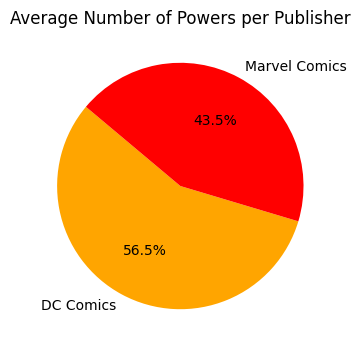

In [82]:
average_powers_per_publisher = villian.groupby('publisher')['num_powers'].mean()

plt.figure(figsize=(6, 4))
average_powers_per_publisher.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'red'], startangle=140)
plt.title('Average Number of Powers per Publisher')
plt.ylabel('')
plt.show()


Although DC has a much smaller number of villians than Marvel, the number of powers that DC villians have is greater than the number of powers that Marvel villians have.



In [83]:
top_3_villians = villian.nlargest(3, 'num_powers')
top_3_villians

,name,num_powers,publisher
5,Amazo,44,DC Comics
98,Mister Mxyzptlk,31,DC Comics
140,Thanos,31,Marvel Comics


The most powerful villian is Amazo from DC

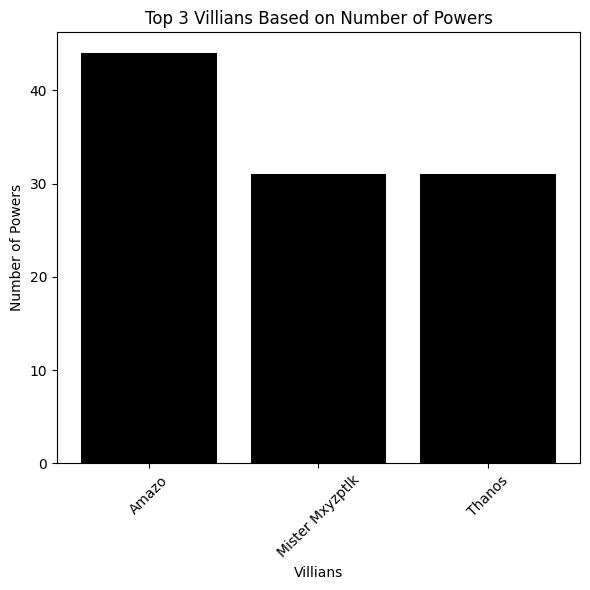

In [84]:
plt.figure(figsize=(6, 6))
plt.bar(top_3_villians['name'], top_3_villians['num_powers'], color='Black')
plt.xlabel('Villians')
plt.ylabel('Number of Powers')
plt.title('Top 3 Villians Based on Number of Powers')
plt.xticks(rotation=45)
plt.savefig('top_3_villians.png')
plt.tight_layout()
plt.show()

From all of this we can say that DC has a little number of characters compared to Marvel but these characters have more powers than characters in Marvel except anti heroes but there are just 22 anti heroes so, this not a big problem.
<br>
We can say one character in DC can fight 2 or 3 characters in Marvel together.